<h1 style="text-align:center">Airborne Object Tracking Dataset</h1>
<h2 style="text-align:center;text-decoration:underline;">Dataset Walkthrough</h2>

In [1]:
import os
cwd = os.getcwd()
cwd

'e:\\Codes\\data-preprocessing_cv-skills\\aot_data_extract'

In [2]:
%cd E:\Datasets\AmazonAirPrime

cwd = os.getcwd()
cwd

E:\Datasets\AmazonAirPrime


'E:\\Datasets\\AmazonAirPrime'

# 🤫 Setting up

In [3]:
import json
import random
import os, sys
from IPython.display import display, clear_output, HTML
from random import randrange, choice
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=25,25
import numpy as np
import seaborn as sns

# Because Life, Universe and Everything!
random.seed(42)

def mdprint(text):
    display({
        'text/markdown': text,
        'text/plain': text
    }, raw=True)

!git clone http://gitlab.aicrowd.com/amazon-prime-air/airborne-detection-starter-kit.git


fatal: destination path 'airborne-detection-starter-kit' already exists and is not an empty directory.


In [4]:
os.chdir(cwd+"/airborne-detection-starter-kit/data")

# ⏱ Loading the Dataset

In [5]:
# Dataset for Airborne Object Tracking Dataset
sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())))
sys.path.append(os.path.dirname(os.path.realpath(os.getcwd())) + "/core")
!pip install -r ../requirements.txt > /dev/null
from core.dataset import Dataset
notebook_path = os.path.dirname(os.path.realpath("__file__"))


Sistem belirtilen yolu bulam�yor.


In [5]:
!aws s3 sync s3://airborne-obj-detection-challenge-training/part1 part1/ --no-sign-request

^C


In [6]:
birinci_True_ikinci_False= True
if birinci_True_ikinci_False:
  # 1.sı expolere
  local_path = notebook_path + '/part1'
  s3_path = 's3://airborne-obj-detection-challenge-training/part1/'
  dataset = Dataset(local_path, s3_path, partial=True, prefix='part1')
else:
#2.si
  local_path = notebook_path + '/part1'
  s3_path = 's3://airborne-obj-detection-challenge-training/part1/'
  dataset = Dataset(local_path, s3_path)

  '''# `local_path` -> dataset is automatically downloaded to that folder
  # `s3_path` -> location to look for images in case they aren't present locally

  # You can add multi-part dataset as well, using below..
  local_path = notebook_path + '/part2'
  s3_path = 's3://airborne-obj-detection-challenge-training/part2/'
  dataset.add(local_path, s3_path, prefix='part2')

  # You can add multi-part dataset as well, using below..
  local_path = notebook_path + '/part3'
  s3_path = 's3://airborne-obj-detection-challenge-training/part3/'
  dataset.add(local_path, s3_path, prefix='part3')'''

2023-02-27 13:07:11.445 | INFO     | core.dataset:load_ve:36 - Loading valid encounters...
2023-02-27 13:07:11.647 | INFO     | core.dataset:load_gt:20 - Loading ground truth...
2023-02-27 13:07:32.158 | INFO     | core.dataset:load_gt:30 - Skipping flight, not present in valid encounters: 673f29c3e4b4428fa26bc55d812d45d9
2023-02-27 13:07:32.158 | INFO     | core.dataset:load_gt:30 - Skipping flight, not present in valid encounters: 63c5597a57b04b448723f1f1844a2b78
2023-02-27 13:07:32.164 | INFO     | core.dataset:load_gt:30 - Skipping flight, not present in valid encounters: 4458bb328345402c8f363b7480060393
2023-02-27 13:07:32.172 | INFO     | core.dataset:load_gt:30 - Skipping flight, not present in valid encounters: 7f5dd587c1b046efbf9e3221fe633e4e
2023-02-27 13:07:32.174 | INFO     | core.dataset:load_gt:30 - Skipping flight, not present in valid encounters: 3c349bdf14c1464bb2b30094e7297d84
2023-02-27 13:07:32.176 | INFO     | core.dataset:load_gt:30 - Skipping flight, not present 

## 🌱 Ground Truth Structure

Ground truth (present in `ImageSets` folder) contains all the relevant information regarding airborne objects, their locations, bbox and so on.
While the `Images` folder have accompanied images for your training code to work on.

Before we start, let's check the vocabulary we will need to understand the dataset:

* `flights` (a.k.a. `samples` in ground truth):<br>
  One flight is typically 2 minutes video at 10 fps i.e. 1200 images. Each of the frames are present in `Images/{{flight_id}}/` folder. These files are typically 3-4mb each.


* `frame` (a.k.a. `entity` in ground truth):<br>
  This is the most granular unit on which dataset can be sampled. Each frame have information timestamp, frame_id, and label `is_above_horizon`.
  There can be multiple entries for same frame in `entity` when multiple Airborne objects are present.<br>
  When an Airborne object following information is available as well:
  - `id` -> signifies unique ID of this object (for whole frame)
  - `bbox` -> it contains 4 floats signifying `[left, top, width, height]`
  - `blob['range_distance_m']` -> distance of airborne object
  - `labels['is_above_horizon']` -> details below
  - (derived) `planned` -> for the planned objects `range_distance_m` is available
    

* `is_above_horizon`:<br>
  It is marked as 1 when Airborne object is above horizon and -1 when it is below horizon. When unclear, it is marked as 0.

Example for frame level data (multiple per frame):

```json
{
    'time': 1550844897919368155,
    'blob': {
        'frame': 480,
        'range_distance_m': nan # signifies, it was an unplanned object
    },
    'id': 'Bird2',
    'bb': [1013.4, 515.8, 6.0, 6.0],
    'labels': {'is_above_horizon': 1},
    'flight_id': '280dc81adbb3420cab502fb88d6abf84',
    'img_name': '1550844897919368155280dc81adbb3420cab502fb88d6abf84.png'
}
```

**You can read more about the dataset in [DATASET.md file in the starter kit](https://gitlab.aicrowd.com/amazon-prime-air/airborne-detection-starter-kit/-/blob/master/docs/DATASET.md).**

# 👀 1.DeepDive into Flight



In [23]:
tek_ucus_True_rastgele_ucus_False = True
yazilari_yaz = False

if tek_ucus_True_rastgele_ucus_False:
  lucky_flight_id = 'x'
  lucky_flight = dataset.get_flight_by_id(lucky_flight_id)
  yazilari_yaz = True
else:
  onceki_idler= ['3bcaec01a5b04e6db6819957abff6c18','3d22f6d2c12e45ea814ae779f9baafc8','6dd06a32dc4c4681a8c54f6497def79b']  
  while True:
    all_flight_ids = dataset.get_flight_ids()
    lucky_flight_id = random.choice(all_flight_ids)
    lucky_flight = dataset.get_flight_by_id(lucky_flight_id)
    if lucky_flight.num_frames > 10*12:
      if lucky_flight_id in onceki_idler:
        continue
      yazilari_yaz = True
      break


if yazilari_yaz:

  mdprint("## 🔮Lucky draw tells us to continue with: `%s`" % lucky_flight_id)

  mdprint("### Let's know our flight a bit more! 🔎")
  print(lucky_flight.num_frames)

  mdprint("This flight has **%s frames** and total **%s airborne objects**." % (lucky_flight.num_frames, lucky_flight.num_airborne_objs))

  mdprint("List of Airborne Objects: ")
  for airborne_obj in lucky_flight.get_airborne_objects():
      mdprint("- %s " % airborne_obj)

  assert lucky_flight.num_airborne_objs > 0, "Unlucky draw; this flight sequence have 0 airborne objects; please re-run this cell"
  

KeyError: 'x'

In [ ]:
'''!aws s3 sync s3://airborne-obj-detection-challenge-training/part1/Images/3bcaec01a5b04e6db6819957abff6c18 part1/Images/3bcaec01a5b04e6db6819957abff6c18 --no-sign-request'''

### 🛫 We know text content isn't lucrative, no?!

#### 💾 Download whole dataset (optional)

Please note, **downloading image for each frame** would be slower, so when using for training downloading whole dataset is preferred. 

You can download full dataset using following command in your directory:

```
aws s3 sync s3://airborne-obj-detection-challenge-training/part1 part1/ --no-sign-request
aws s3 sync s3://airborne-obj-detection-challenge-training/part1 part2/ --no-sign-request
aws s3 sync s3://airborne-obj-detection-challenge-training/part1 part3/ --no-sign-request
```

#### 💾 Download whole flight (optional)

**NOTE:**
Each flight is roughly 3-5GB in size, due to which it will take time to download. The dataset helper scripts _can_ be run without downloading dataset as well, so you can skip below download in case you hate waiting! :)

You can download individual flight using below command:

```
aws s3 sync s3://airborne-obj-detection-challenge-training/part1/Images/{{flight_id}} part1/Images/{{flight_id}} --no-sign-request
```

or:


In [ ]:
# (optional) can take upto 5-10 mins on Colab

daha_once_indirdin_mi= False
if daha_once_indirdin_mi==False:
  lucky_flight.download()
  # flight_path = lucky_flight.generate_video(speed_x=3)
  flight_path = lucky_flight.generate_video()

2023-02-07 14:47:18.440 | INFO     | core.flight:generate_video:128 - Generating video...


#### 🌤 Let's quickly check how the scenery looks like in this video

In [ ]:
image = lucky_flight.get_frame(choice(list(lucky_flight.frames.keys()))).image()
display(image)

#### 🖼️Well, one picture doesn't give much idea, let's try out few frames (n=9) 
_You can try out whole video as well if you have dataset downloaded_

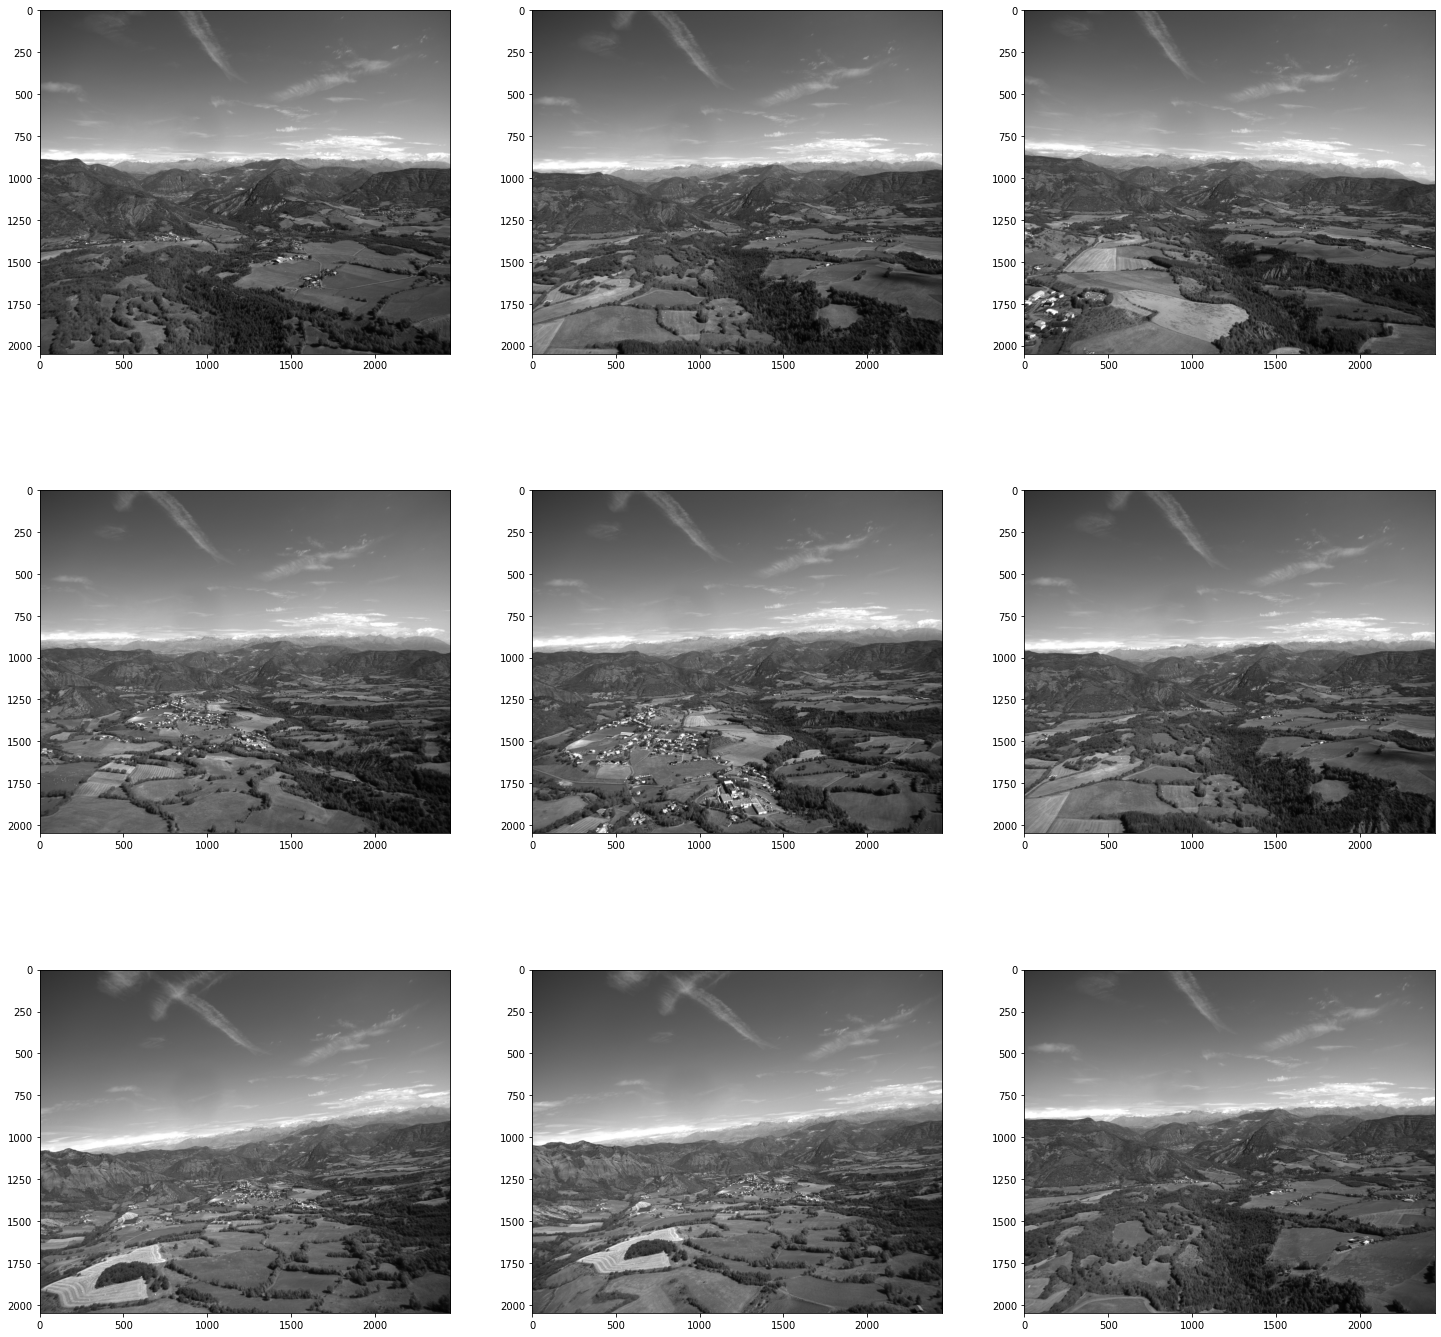

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=25,25
fig = plt.figure()

for i in range(1, 10):
    ax = fig.add_subplot(3, 3, i)
    ax.imshow(lucky_flight.get_frame(choice(list(lucky_flight.frames.keys()))).image(type='cv2'))

plt.show()

#### 📉 Presence of the objects and distance in frames (when present)

In [ ]:
# keys
def remove_numbers(s):
  return ''.join([i for i in s if not i.isdigit()])

all_keys = []
for flight_id in dataset.get_flight_ids():
    flight = dataset.get_flight(flight_id)
    flight = lucky_flight
    all_keys.extend([remove_numbers(k) for k in flight.detected_objects])

unique_keys = list(set(all_keys))
unique_keys

#['Airplane 0', 'Helicopter 1', 'Bird 2 ','BIrd 2', 'Drone 3', 'Flock 4' , 'Airborne 5']

['Airborne', 'Helicopter', 'Bird']

## Yoloya göre txt leri hazırla

In [ ]:
def selected_class_id(type_str):
  print("selected_class_id", type_str)
  if type_str =='Airplane':
    return 0
  elif type_str =='Helicopter':
    return 1
  elif type_str =='Bird' or type =='BIrd':
    return 2
  elif type_str =='Drone':
    return 3
  elif type_str =='Flock':
    return 4
  elif type_str =='Airborne':
    return 5
  else:
    raise Exception("bu sınıf yok")

In [ ]:
tifCounter = 0
myPath = local_path+'/Images/'+lucky_flight_id
print(myPath)
for root, dirs, files in os.walk(myPath):
    for file in files:    
        if file.endswith('.txt'):
          #print(file)
          os.remove(myPath+'/'+file)
          tifCounter += 1

tifCounter

rows = []
height, width = 2048 , 2448

myPath = local_path+'/Images/'+lucky_flight_id

resim_indir = 0
for obj_key in lucky_flight.detected_objects:
  object_type = remove_numbers(obj_key)
  print('object_type',object_type)
  obj = lucky_flight.detected_objects[obj_key]
  print('obj',obj)
  
  for loc in obj.location:

    resim_indir = resim_indir + 1
    bbox = loc.bb.get_bbox()
    #print('bbox',bbox)
    frame_id = loc.frame.id
    #print('frame_id',frame_id)
    range_distance = loc.range_distance_m
    #print('range_distance',range_distance)
    image_path = loc.frame.image_path()
    #print('image_path',image_path)
    rows.append([flight_id, object_type, obj_key, frame_id,*bbox, bbox[-1]*bbox[-2], image_path, range_distance])

    (x, y, w, h) = [int(v) for v in bbox]

    tt_x = (x + (x+w))/2
    tt_y = (y +(y+h))/2
    yolo_x = format(tt_x/width, '.6f')
    yolo_y = format(tt_y/height, '.6f')

    yolo_w = format(w/width, '.6f')
    yolo_h = format(h/height, '.6f')

    yolo_line = '{0} {1} {2} {3} {4}'.format(selected_class_id(object_type), yolo_x, yolo_y, yolo_w, yolo_h)

    txt_path= image_path.split(".")[0]
    print(txt_path)
    txt_path=local_path+'/'+txt_path+".txt"
    if os.path.exists(txt_path)==False:
      file = open(txt_path, 'w')
      file.close()


    infile = open(txt_path,'r', encoding='utf-8').readlines()
    with open(txt_path, 'w', encoding='utf-8') as outfile:
      outfile.writelines(infile)
      outfile.writelines(yolo_line+"\n")

    print('--------------------------')

    print('resim_indir',resim_indir)
    #if resim_indir>200000000:
      #break
  #break
    

/content/drive/My Drive/Colab Notebooks/AOT data extract/airborne-detection-starter-kit/data/part1/Images/3bcaec01a5b04e6db6819957abff6c18
object_type Airborne
obj AirborneObject#Airborne1(num_frames=209, planned=False)
selected_class_id Airborne
Images/3bcaec01a5b04e6db6819957abff6c18/15665454063311807893bcaec01a5b04e6db6819957abff6c18
--------------------------
resim_indir 1
selected_class_id Airborne
Images/3bcaec01a5b04e6db6819957abff6c18/15665454064305978353bcaec01a5b04e6db6819957abff6c18
--------------------------
resim_indir 2
selected_class_id Airborne
Images/3bcaec01a5b04e6db6819957abff6c18/15665454065318023303bcaec01a5b04e6db6819957abff6c18
--------------------------
resim_indir 3
selected_class_id Airborne
Images/3bcaec01a5b04e6db6819957abff6c18/15665454066370906383bcaec01a5b04e6db6819957abff6c18
--------------------------
resim_indir 4
selected_class_id Airborne
Images/3bcaec01a5b04e6db6819957abff6c18/15665454067313979003bcaec01a5b04e6db6819957abff6c18
---------------------

In [ ]:
import pandas as pd
df = pd.DataFrame(rows)
df.columns = ['flight_id', 'object_type', 'object', 'frame_id', 
              'left', 'top', 'width', 'height', 'area', 'image_path','range_distance']
df.head()

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance
0,46373155e5994db681f6b88f7813adc5,Airborne,Airborne1,3,1910.70105,798.674316,6.0,6.0,36.0,Images/3bcaec01a5b04e6db6819957abff6c18/156654...,NaN
1,46373155e5994db681f6b88f7813adc5,Airborne,Airborne1,4,1922.00000,793.600000,6.0,6.0,36.0,Images/3bcaec01a5b04e6db6819957abff6c18/156654...,NaN
2,46373155e5994db681f6b88f7813adc5,Airborne,Airborne1,5,1937.80000,789.800000,6.0,6.0,36.0,Images/3bcaec01a5b04e6db6819957abff6c18/156654...,NaN
3,46373155e5994db681f6b88f7813adc5,Airborne,Airborne1,6,1954.60000,781.400000,6.0,6.0,36.0,Images/3bcaec01a5b04e6db6819957abff6c18/156654...,NaN
4,46373155e5994db681f6b88f7813adc5,Airborne,Airborne1,7,1978.00000,776.200000,6.0,6.0,36.0,Images/3bcaec01a5b04e6db6819957abff6c18/156654...,NaN


In [ ]:
df.tail()

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance
811,46373155e5994db681f6b88f7813adc5,Airborne,Airborne2,1195,107.216216,1100.459459,6.0,6.0,36.0,Images/3bcaec01a5b04e6db6819957abff6c18/156654...,NaN
812,46373155e5994db681f6b88f7813adc5,Airborne,Airborne2,1196,87.756757,1107.756757,6.0,6.0,36.0,Images/3bcaec01a5b04e6db6819957abff6c18/156654...,NaN
813,46373155e5994db681f6b88f7813adc5,Airborne,Airborne2,1197,61.540541,1111.540541,6.0,6.0,36.0,Images/3bcaec01a5b04e6db6819957abff6c18/156654...,NaN
814,46373155e5994db681f6b88f7813adc5,Airborne,Airborne2,1198,39.108108,1114.783784,6.0,6.0,36.0,Images/3bcaec01a5b04e6db6819957abff6c18/156654...,NaN
815,46373155e5994db681f6b88f7813adc5,Airborne,Airborne2,1199,17.216216,1121.810811,6.0,6.0,36.0,Images/3bcaec01a5b04e6db6819957abff6c18/156654...,NaN


airborne_objects {'Airborne1': <core.airborne_object.AirborneObject object at 0x7f7de0f1fe20>, 'Bird1': <core.airborne_object.AirborneObject object at 0x7f7de0f1ff40>, 'Helicopter1': <core.airborne_object.AirborneObject object at 0x7f7de0ebbb80>, 'Airborne2': <core.airborne_object.AirborneObject object at 0x7f7de0e47520>}
len(frames) 1199
lucky_flight.frames:  {3: <core.frame.Frame object at 0x7f7de0f1fdf0>, 4: <core.frame.Frame object at 0x7f7de0f260a0>, 5: <core.frame.Frame object at 0x7f7de0f26250>, 6: <core.frame.Frame object at 0x7f7de0f26400>, 7: <core.frame.Frame object at 0x7f7de0f265b0>, 8: <core.frame.Frame object at 0x7f7de0f26760>, 9: <core.frame.Frame object at 0x7f7de0f26910>, 10: <core.frame.Frame object at 0x7f7de0f26ac0>, 11: <core.frame.Frame object at 0x7f7de0f26c70>, 12: <core.frame.Frame object at 0x7f7de0f26e20>, 13: <core.frame.Frame object at 0x7f7de0f26fd0>, 14: <core.frame.Frame object at 0x7f7de0f291c0>, 15: <core.frame.Frame object at 0x7f7de0f29370>, 16: <c

<Figure size 2000x2000 with 0 Axes>

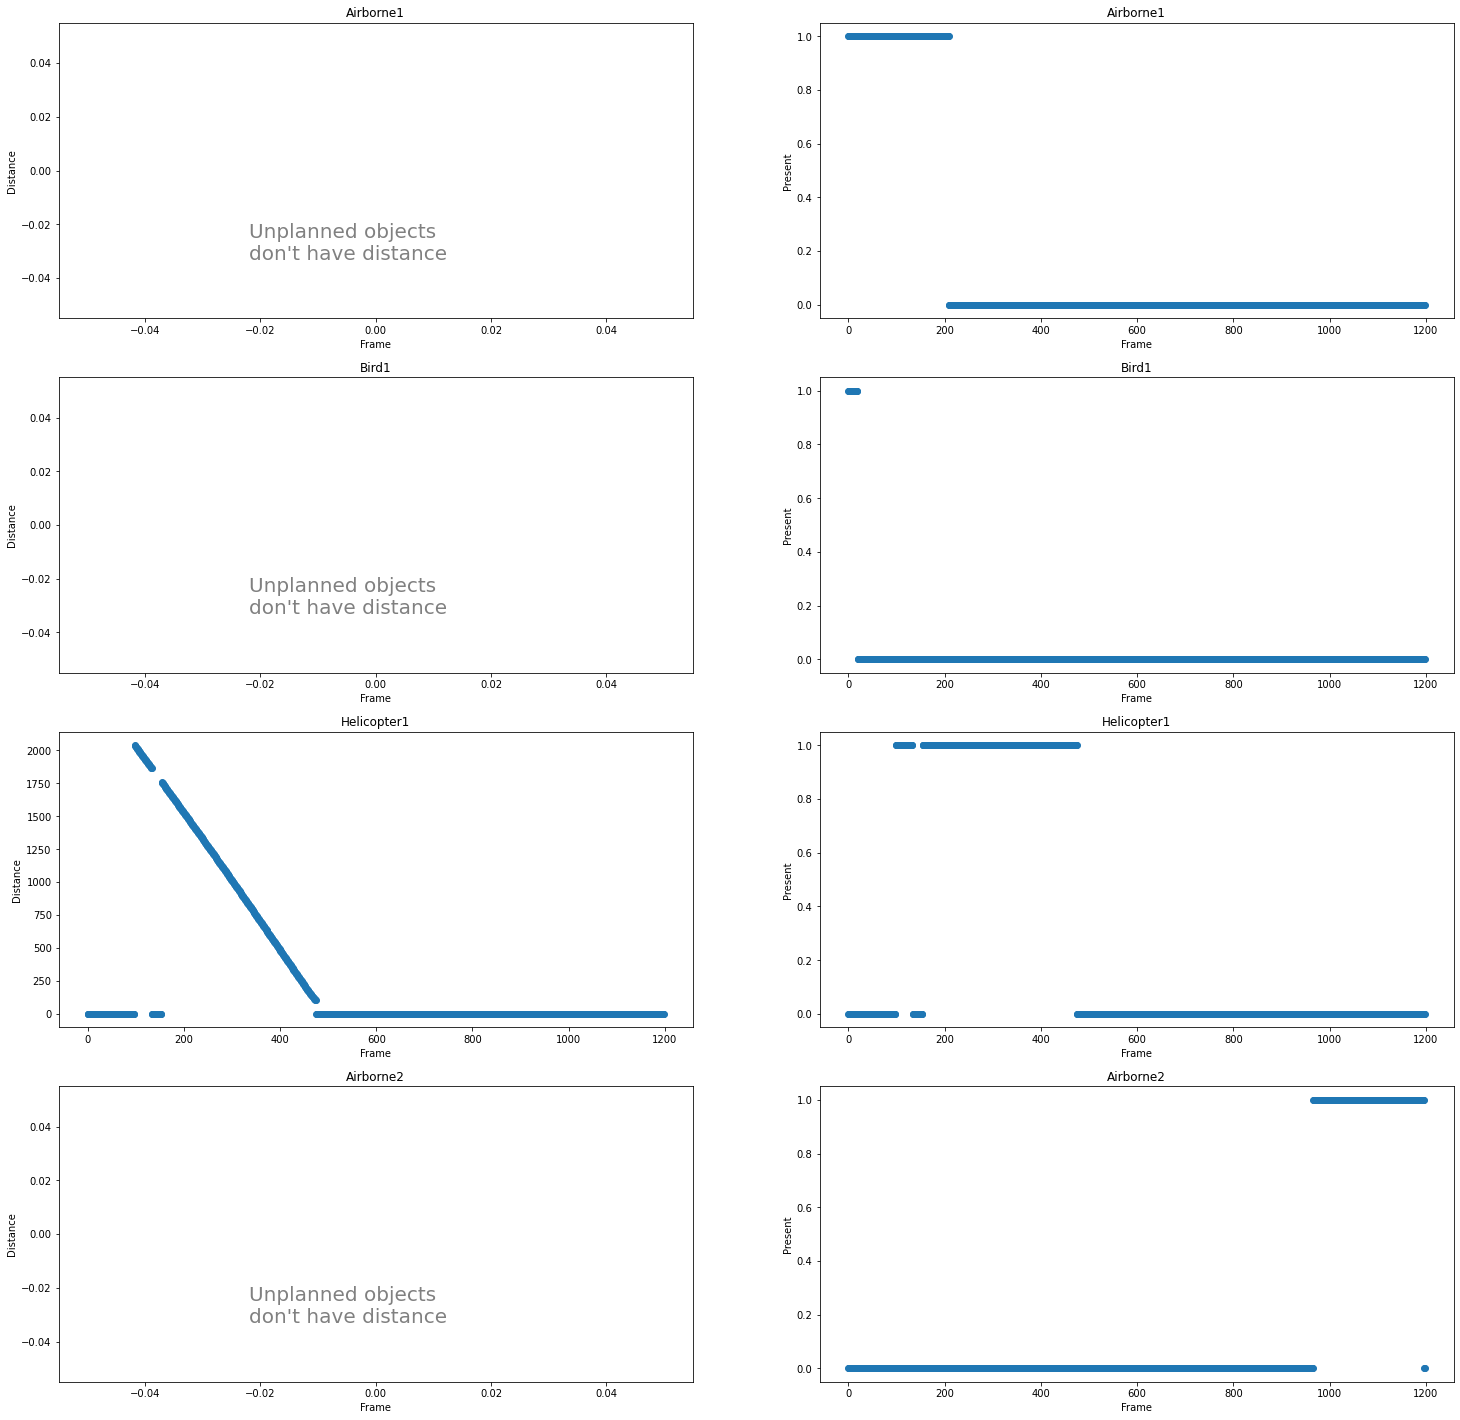

None

In [ ]:
airborne_objects = lucky_flight.detected_objects
frames = lucky_flight.frames

rows = len(airborne_objects.keys())

detected = {}
distance = {}

print('airborne_objects',airborne_objects)
print('len(frames)',len(frames))
print('lucky_flight.frames: ',lucky_flight.frames)

for frame_id in lucky_flight.frames:
    f = lucky_flight.get_frame(frame_id)
    for obj in airborne_objects:
        if obj not in detected:
            detected[obj] = []
            distance[obj] = []

        if obj in f.detected_objects:
            detected[obj].append(True)
            distance[obj].append(f.detected_object_locations[obj].range_distance_m)
        else:
            detected[obj].append(False)
            if not airborne_objects[obj].planned:
                distance[obj].append(float("NaN"))
            else:
                distance[obj].append(0)

i = 0
f = plt.figure(figsize=(25, 25), dpi=80)
f, axes = plt.subplots(nrows = rows, ncols = 2, squeeze=False)

print('detected', detected)
for obj in detected:
    axes[i][0].scatter(range(len(distance[obj])), distance[obj])
    axes[i][0].set_xlabel('Frame')
    axes[i][0].set_ylabel('Distance')
    axes[i][0].set_title(obj)
    
    if not airborne_objects[obj].planned:
        plt.text(0.3, 0.2, "Unplanned objects\ndon't have distance", 
                 fontsize=20, transform=axes[i][0].transAxes, color="grey")

    axes[i][1].scatter(range(len(detected[obj])), detected[obj])
    axes[i][1].set_xlabel('Frame')
    axes[i][1].set_ylabel('Present')
    axes[i][1].set_title(obj)
    i += 1

# for obj in detected:
#     dt = random.choice(airborne_objects[obj].location)
#     img = dt.frame.image_annotated()
#     axes[[i, i+1]][1].imshow(img)
display(plt.show())

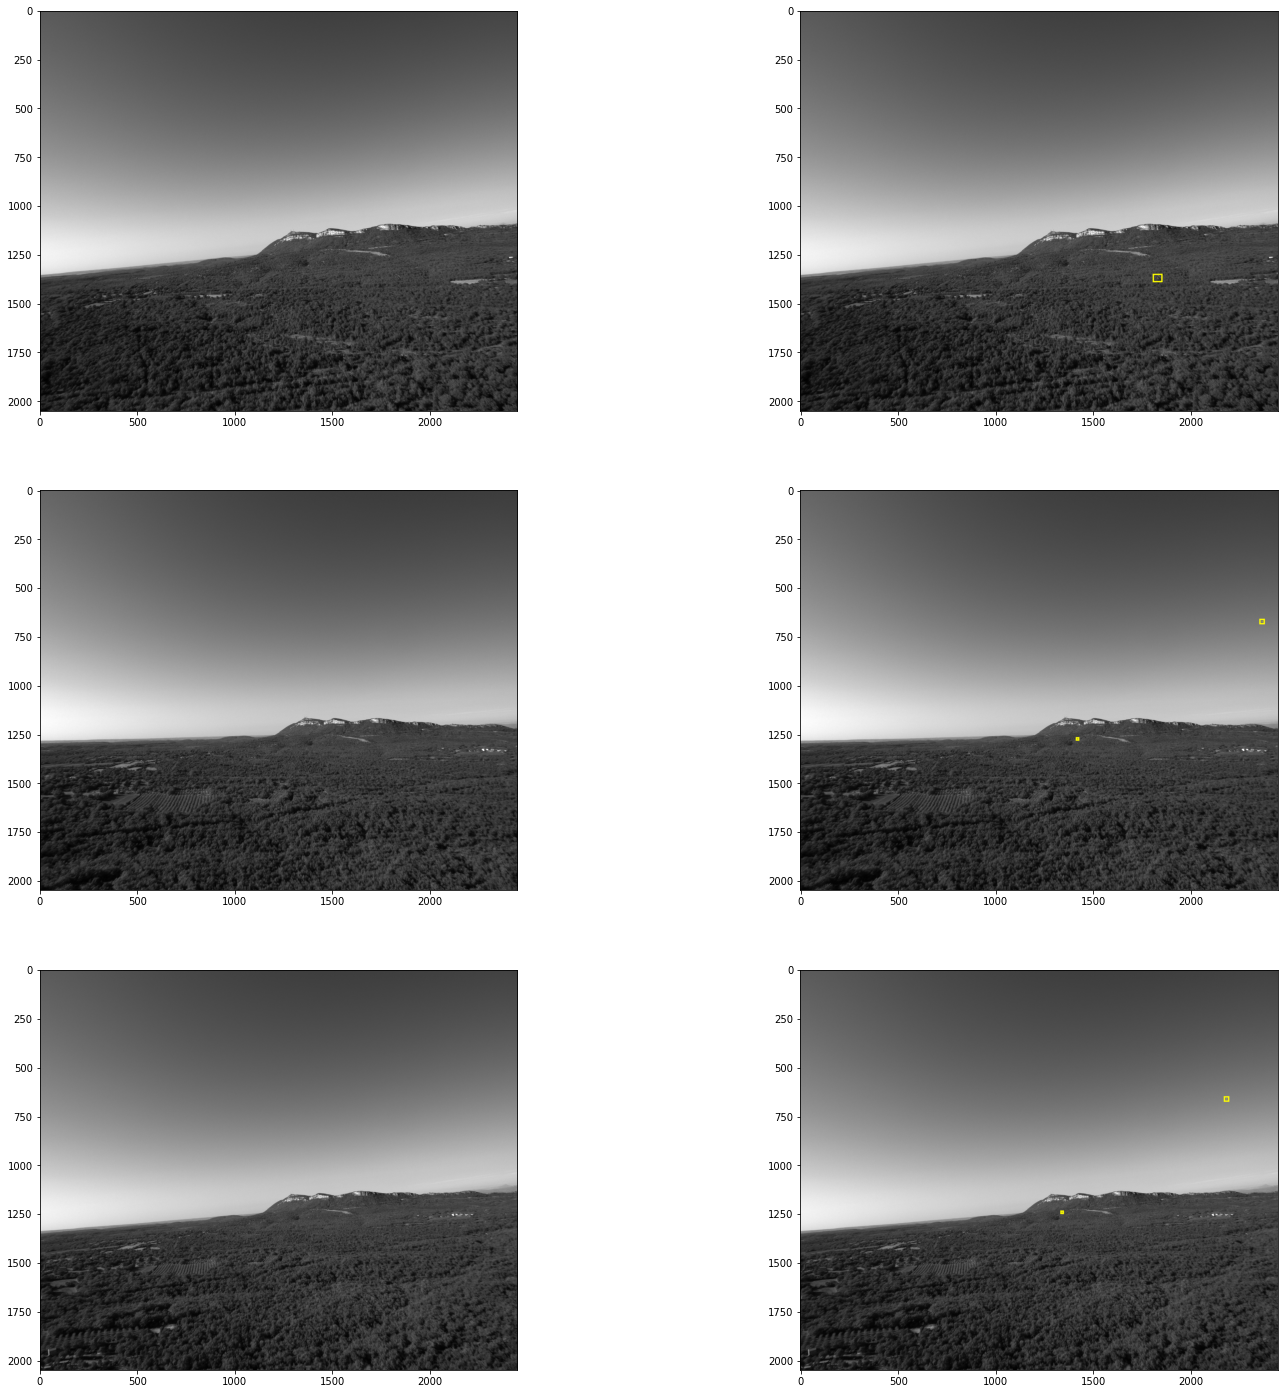

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=25,25

import time

# Let's get one of the "planned" object in this video
airborne_objects = lucky_flight.detected_objects
obj_of_interest = None
for obj in airborne_objects:
    if airborne_objects[obj].planned:
        obj_of_interest = airborne_objects[obj]
        break

images = []
fig = plt.figure()


for i in range(1, 7, 2):
    frame = obj_of_interest.location[randrange(obj_of_interest.num_frames)].frame
    ax = fig.add_subplot(3, 2, i)
    ax.imshow(frame.image(type='cv2'))
    ax = fig.add_subplot(3, 2, i + 1)
    ax.imshow(frame.image_annotated())

plt.show()

## Overall Distribution

*Please use `partial=False` for getting correct distributions below!*

#### ✈️ Airborne Objects Count Distribution

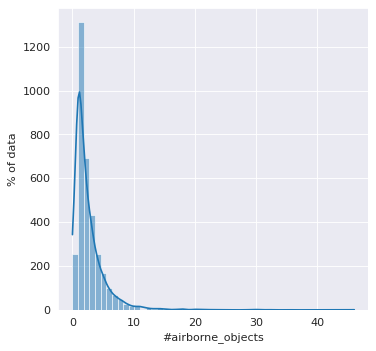

None

Avg:  2.5532286212914483
Min:  0
Max:  46


In [ ]:
num_objects = []
for flight_id in dataset.get_flight_ids():
    num_objects.append(dataset.get_flight(flight_id).num_airborne_objs)

plt.figure(figsize=(5, 5), dpi=80)
with sns.axes_style("darkgrid"):
  sns.histplot(num_objects, kde=True, bins=50)
plt.ylabel('% of data')
plt.xlabel('#airborne_objects')
display(plt.show())


print("Avg: ", sum(num_objects) / len(num_objects))
print("Min: ", min(num_objects))
print("Max: ", max(num_objects))

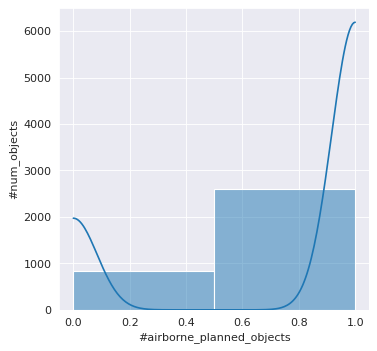

None

Min:  0
Max:  1


In [ ]:
planned_num_objects = []
for flight_id in dataset.get_flight_ids():
    count = 0
    flight = dataset.get_flight(flight_id)
    for obj in flight.detected_objects:
        if flight.detected_objects[obj].planned:
            count += 1
    
    planned_num_objects.append(count)
    
plt.figure(figsize=(5, 5), dpi=80)
with sns.axes_style("darkgrid"):
  sns.histplot(planned_num_objects, kde=True, bins=2)
plt.ylabel('#num_objects')
plt.xlabel('#airborne_planned_objects')
display(plt.show())


print("Min: ", min(planned_num_objects))
print("Max: ", max(planned_num_objects))

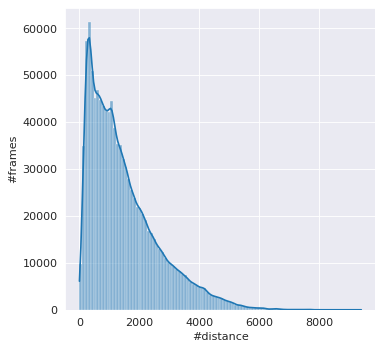

None

Avg:  1478.4207554675852
Min:  5.905805858280435
Max:  9399.925781456264


In [ ]:
obj_distance = []

for flight_id in dataset.get_flight_ids():
    flight = dataset.get_flight(flight_id)
    for obj in flight.detected_objects:
        if flight.detected_objects[obj].planned:
            for loc in flight.detected_objects[obj].location:
                obj_distance.append(loc.range_distance_m)

plt.figure(figsize=(5, 5), dpi=80)
with sns.axes_style("darkgrid"):
  sns.histplot(obj_distance, kde=True, bins=100)
plt.ylabel('#frames')
plt.xlabel('#distance')
display(plt.show())

print("Avg: ", sum(obj_distance) / len(obj_distance))
print("Min: ", min(obj_distance))
print("Max: ", max(obj_distance))

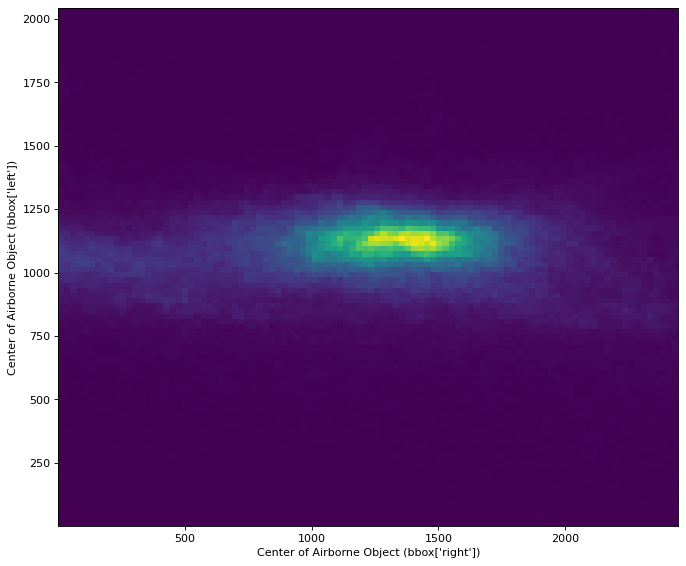

In [ ]:
obj_center_left = []
obj_center_top = []

for flight_id in dataset.get_flight_ids():
    flight = dataset.get_flight(flight_id)
    for obj in flight.detected_objects:
        if flight.detected_objects[obj].planned:
            for loc in flight.detected_objects[obj].location:
                left, top = loc.bb.get_center()
                obj_center_left.append(left)
                obj_center_top.append(top)

heatmap, xedges, yedges = np.histogram2d(obj_center_left, obj_center_top, bins=100)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(10, 10), dpi=80)
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.ylabel("Center of Airborne Object (bbox['left'])")
plt.xlabel("Center of Airborne Object (bbox['right'])")
plt.show()

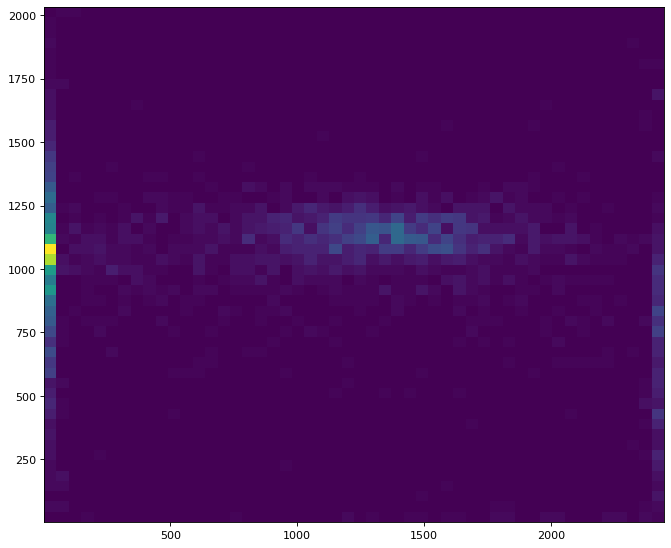

In [ ]:
# Entry
# From where the Airborne objects generally start in whole flight
# Based on data it definitely looks like it come from left most of the times...

obj_center_left_entry = []
obj_center_top_entry = []

for flight_id in dataset.get_flight_ids():
    flight = dataset.get_flight(flight_id)
    for obj in flight.detected_objects:
        if flight.detected_objects[obj].planned:
            for loc in flight.detected_objects[obj].location:
                left, top = loc.bb.get_center()
                obj_center_left_entry.append(left)
                obj_center_top_entry.append(top)
                break

heatmap, xedges, yedges = np.histogram2d(obj_center_left_entry, obj_center_top_entry, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(10, 10), dpi=80)
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

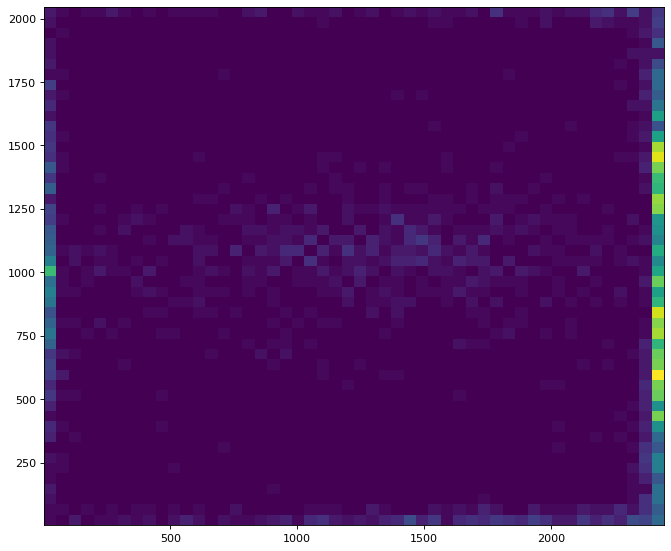

In [ ]:
# Exit
# From where the Airborne objects generally exit in whole flight
# Based on data it definitely looks like it come from left and **leave** at right most of the times...
obj_center_left_entry = []
obj_center_top_entry = []

for flight_id in dataset.get_flight_ids():
    flight = dataset.get_flight(flight_id)
    for obj in flight.detected_objects:
        if flight.detected_objects[obj].planned:
            loc = flight.detected_objects[obj].location[-1]
            left, top = loc.bb.get_center()
            obj_center_left_entry.append(left)
            obj_center_top_entry.append(top)

heatmap, xedges, yedges = np.histogram2d(obj_center_left_entry, obj_center_top_entry, bins=50)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.figure(figsize=(10, 10), dpi=80)
plt.clf()
plt.imshow(heatmap.T, extent=extent, origin='lower')
plt.show()

## Split etme

In [ ]:
myPath = local_path+'/Images/'+lucky_flight_id
myPath

'/content/drive/My Drive/Colab Notebooks/AOT data extract/airborne-detection-starter-kit/data/part1/Images/3bcaec01a5b04e6db6819957abff6c18'

In [ ]:
current_dir = myPath
yolo_output_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/AOT data extract/', "yolo_dataset/" )
yolo_output_dir

if os.path.exists(yolo_output_dir)==False:
  print('created')
  os.mkdir(yolo_output_dir)

In [ ]:
# bunlar resımler için
images_yolo_output_dir = os.path.join(yolo_output_dir, "images")
if os.path.exists(images_yolo_output_dir)==False:
    os.mkdir(images_yolo_output_dir)

train_images_yolo_output_dir = os.path.join(images_yolo_output_dir, "train")
if os.path.exists(train_images_yolo_output_dir)==False:
    os.mkdir(train_images_yolo_output_dir)

val_images_yolo_output_dir = os.path.join(images_yolo_output_dir, "val")
if os.path.exists(val_images_yolo_output_dir)==False:
    os.mkdir(val_images_yolo_output_dir)

In [ ]:
#bunlar etıketler ıcın
labels_yolo_output_dir = os.path.join(yolo_output_dir, "labels")
if os.path.exists(labels_yolo_output_dir)==False:
    os.mkdir(labels_yolo_output_dir)

train_labels_yolo_output_dir = os.path.join(labels_yolo_output_dir, "train")
if os.path.exists(train_labels_yolo_output_dir)==False:
    os.mkdir(train_labels_yolo_output_dir)

val_labels_yolo_output_dir = os.path.join(labels_yolo_output_dir, "val")
if os.path.exists(val_labels_yolo_output_dir)==False:
    os.mkdir(val_labels_yolo_output_dir)

In [ ]:
split_max_class_count = 5
file_yaml = open(yolo_output_dir+'custom.yaml', 'w')

file_yaml.write("train: "+os.path.join('..\yolo_dataset',"images","train") + "\n")
file_yaml.write("val: "+os.path.join('..\yolo_dataset',"images","val") + "\n")

file_yaml.write("\n")
file_yaml.write("\n")
file_yaml.write("# number of classes"+"\n")
file_yaml.write("nc: "+str(split_max_class_count+1))
file_yaml.write("\n")
file_yaml.write("\n")
file_yaml.write("# class names"+ "\n")

class_name = "names: ["
for i in range(int(split_max_class_count)+1):
  if i == split_max_class_count:
    class_name = class_name+"'"+str(i)
  else:
    class_name = class_name+"'"+str(i)+"',"
class_name = class_name +"]"

file_yaml.write(class_name+"\n")
file_yaml.close()

In [ ]:
val_images_yolo_output_dir

'/content/drive/My Drive/Colab Notebooks/AOT data extract/yolo_dataset/images/val'

In [ ]:
import glob
import os
import shutil

split_percentage_valid = 20

counter = 1
sorunlu_sayisi=0
index_test = round(100 / split_percentage_valid)
for png_file in glob.iglob(os.path.join(current_dir, '*.png')):
  title, ext = os.path.splitext(os.path.basename(png_file))
  txt_file = os.path.join(current_dir, title+'.txt')
  if counter == index_test:
    counter = 1
    try:
      shutil.move(png_file, val_images_yolo_output_dir)
      shutil.move(txt_file, val_labels_yolo_output_dir)
    except:
      print("txt yok olabılır",title,ext)
      sorunlu_sayisi = sorunlu_sayisi +1
  else:
    try:
      shutil.move(png_file, train_images_yolo_output_dir)
      shutil.move(txt_file, train_labels_yolo_output_dir)
    except:
      print("txt yok olabılır",title,ext)
      sorunlu_sayisi = sorunlu_sayisi +1
    counter = counter + 1

print('sorunlu_sayisi',sorunlu_sayisi)

txt yok olabılır 15665454966744499053bcaec01a5b04e6db6819957abff6c18 .png
txt yok olabılır 15665454967744738233bcaec01a5b04e6db6819957abff6c18 .png
txt yok olabılır 15665454969000465473bcaec01a5b04e6db6819957abff6c18 .png
txt yok olabılır 15665454969750050183bcaec01a5b04e6db6819957abff6c18 .png
txt yok olabılır 15665454971043119183bcaec01a5b04e6db6819957abff6c18 .png
txt yok olabılır 15665454971912357873bcaec01a5b04e6db6819957abff6c18 .png
txt yok olabılır 15665454972904046293bcaec01a5b04e6db6819957abff6c18 .png
txt yok olabılır 15665454973997655193bcaec01a5b04e6db6819957abff6c18 .png
txt yok olabılır 15665454974733874093bcaec01a5b04e6db6819957abff6c18 .png
txt yok olabılır 15665454975972060043bcaec01a5b04e6db6819957abff6c18 .png
txt yok olabılır 15665454976733485963bcaec01a5b04e6db6819957abff6c18 .png
txt yok olabılır 15665454977730298853bcaec01a5b04e6db6819957abff6c18 .png
txt yok olabılır 15665454979037591823bcaec01a5b04e6db6819957abff6c18 .png
txt yok olabılır 15665454979949466823b

# 2.diğer

In [ ]:
# keys
def remove_numbers(s):
  return ''.join([i for i in s if not i.isdigit()])

all_keys = []
for flight_id in dataset.get_flight_ids():
    flight = dataset.get_flight(flight_id)
    all_keys.extend([remove_numbers(k) for k in flight.detected_objects])

unique_keys = list(set(all_keys))
unique_keys

['Airborne', 'Drone', 'Helicopter', 'Bird', 'Airplane', 'Flock']

In [ ]:
rows = []
for flight_id in dataset.get_flight_ids():
    flight = dataset.get_flight(flight_id)
    for obj_key in flight.detected_objects:
        object_type = remove_numbers(obj_key)
        obj = flight.detected_objects[obj_key]
        for loc in obj.location:
            bbox = loc.bb.get_bbox()
            frame_id = loc.frame.id
            range_distance = loc.range_distance_m
            image_path = loc.frame.image_path()
            rows.append([flight_id, object_type, obj_key, frame_id, 
                         *bbox, bbox[-1]*bbox[-2], image_path, range_distance])

In [ ]:
import pandas as pd
df = pd.DataFrame(rows)
df.columns = ['flight_id', 'object_type', 'object', 'frame_id', 
              'left', 'top', 'width', 'height', 'area', 'image_path','range_distance']
df.head()

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance
0,part100bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,105,1414.4,1180.0,27.0,7.2,194.40,Images/part100bb96a5a68f4fa5bc5c5dc66ce314d2/1...,699.080159
1,part100bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,106,1416.6,1174.8,28.6,6.6,188.76,Images/part100bb96a5a68f4fa5bc5c5dc66ce314d2/1...,692.630062
2,part100bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,107,1417.4,1171.4,29.2,7.6,221.92,Images/part100bb96a5a68f4fa5bc5c5dc66ce314d2/1...,686.419015
3,part100bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,108,1418.8,1172.4,28.8,7.0,201.60,Images/part100bb96a5a68f4fa5bc5c5dc66ce314d2/1...,679.760444
4,part100bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,109,1422.0,1167.4,29.4,6.8,199.92,Images/part100bb96a5a68f4fa5bc5c5dc66ce314d2/1...,673.387413


In [ ]:
len(df)

1210220

In [ ]:
import random
kac_tane= 100
filtered_df = df.loc[((df['object_type'] == 'Helicopter') | (df['object_type'] == 'Airplane'))]
filtered_df = filtered_df.loc[df['area'] > 400]
flights = filtered_df.index[(filtered_df['object_type'] == 'Airplane')]
helicopters = filtered_df.index[(filtered_df['object_type'] == 'Helicopter')]
counts_dict = dict(filtered_df['image_path'].value_counts())
multi_object_frames = filtered_df[filtered_df.apply(lambda x:counts_dict[x['image_path']] > 1, axis=1)].index
train_indices = random.sample(list(flights),kac_tane) + random.sample(list(helicopters),kac_tane)
train_df = filtered_df.loc[list(set(train_indices))]
filtered_df.head()

,flight_id,object_type,object,frame_id,left,top,width,height,area,image_path,range_distance
23,part100bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,128,1458.0,1143.0,36.6,11.6,424.56,Images/part100bb96a5a68f4fa5bc5c5dc66ce314d2/1...,551.537168
25,part100bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,130,1467.4,1143.2,39.4,11.0,433.40,Images/part100bb96a5a68f4fa5bc5c5dc66ce314d2/1...,538.716655
27,part100bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,132,1478.0,1140.0,37.4,10.8,403.92,Images/part100bb96a5a68f4fa5bc5c5dc66ce314d2/1...,525.940516
31,part100bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,136,1481.0,1139.0,42.4,11.8,500.32,Images/part100bb96a5a68f4fa5bc5c5dc66ce314d2/1...,500.168346
32,part100bb96a5a68f4fa5bc5c5dc66ce314d2,Airplane,Airplane1,137,1481.4,1137.6,41.4,10.8,447.12,Images/part100bb96a5a68f4fa5bc5c5dc66ce314d2/1...,493.715561


In [ ]:
len(filtered_df)

152423

In [ ]:
cwd

'/content/drive/MyDrive/Colab Notebooks/AOT data extract/airborne-detection-starter-kit/data'

In [ ]:
image_path

'Images/46373155e5994db681f6b88f7813adc5/155688764483511865046373155e5994db681f6b88f7813adc5.png'

In [ ]:
s3_path

's3://airborne-obj-detection-challenge-training/part1/'

In [ ]:
download_images = []
for idx in range(len(train_df)):
  flight = dataset.flights[train_df.iloc[idx]['flight_id']]
  frame = flight.frames[train_df.iloc[idx]['frame_id']]
  image_path = frame.image_path()
  s3_path = frame.image_s3_path()
  download_images.append([image_path, image_path])
random.shuffle(download_images)

from tqdm import tqdm
for idx in tqdm(range(100)):
  dataset.file_handler.download_from_s3_parallel(download_images[idx])

  0%|          | 0/100 [00:01<?, ?it/s]


ClientError: ignored

# _fin._

### We hope you had fun exploring data with us! 👋 

### You can fork this notebook to add more explorations in starter kit [here](https://gitlab.aicrowd.com/amazon-prime-air/airborne-detection-starter-kit) or submit your own notebook to the challenge [here](https://www.aicrowd.com/challenges/airborne-object-tracking-challenge/notebooks).